In [40]:
%load_ext autoreload
%autoreload 2
import diffusers
from diffusers import DDPMPipeline, DDPMScheduler, UNet2DModel
import torch
import matplotlib.pyplot as plt
from datasets import load_dataset
import torchvision.transforms as transforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
model = UNet2DModel(
    sample_size=256,
    in_channels=1,
    out_channels=1,
    layers_per_block=2,
    block_out_channels=(128, 128, 256, 256, 512, 512),
    down_block_types=(
        "DownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "DownBlock2D",
    ),
    up_block_types=(
        "UpBlock2D",
        "AttnUpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
    ),
)


/lustre/home/lmucko/.local/lib/python3.10/site-packages/jedi/inference/compiled/subprocess/functions.py:21: UserWarning: Module torchvision.image not importable in path ['/lustre/home/lmucko/diffusion', '/opt/cray/pe/python/3.10.10', '/opt/cray/pe/python/3.10.10/lib/python310.zip', '/opt/cray/pe/python/3.10.10/lib/python3.10', '/opt/cray/pe/python/3.10.10/lib/python3.10/lib-dynload', '/lustre/home/lmucko/.local/lib/python3.10/site-packages', '/opt/cray/pe/python/3.10.10/lib/python3.10/site-packages'].
  return access.load_module(inference_state, **kwargs)


In [42]:
x = torch.randn(1, 1, 256, 256)
y = model(x, 2)

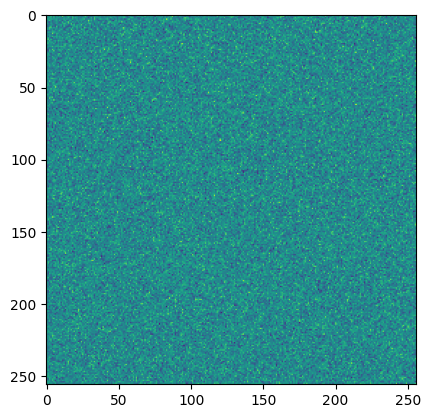

In [43]:
plt.imshow(x.squeeze((0,1)).detach().numpy())

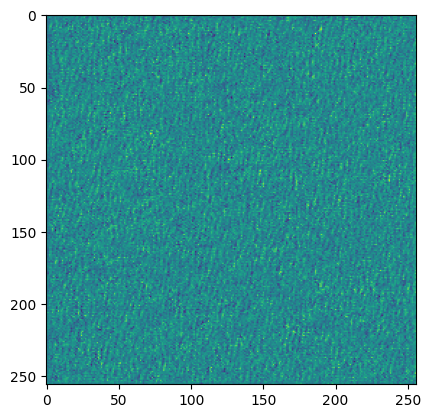

In [47]:
plt.imshow(y.sample.detach().numpy().squeeze((0,1)))

In [45]:
dataset = load_dataset("imagefolder", data_dir="images/", drop_labels=True, split="train")

Resolving data files:   0%|          | 0/600 [00:00<?, ?it/s]

In [48]:
augmentations = transforms.Compose(
    [
        transforms.Resize(256, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.ToTensor()
    ]
)